In [1]:
# API jupyter notebook file

In [2]:
# Dependencies
import requests
import json
import pandas as pd
from pprint import pprint
import numpy as np

# World bank base url
url = "http://api.worldbank.org/v2/country/?format=json"

# create empty list to hold all countries
all_countries = []
income_levels = []
country_codes = []
lats = []
lngs = []
regions = []

# loop through 6 pages of countries, adding countries to our empty list as we go
for x in range(6):
    countries_response = requests.get(f"{url}&page={x+1}").json() 
    #import pdb; pdb.set_trace()
    countries = countries_response[1]
    for country in countries:
        all_countries.append(country["name"])
        income_levels.append(country["incomeLevel"]['value'])
        country_codes.append(country['id'])
        lats.append(country['latitude'])
        lngs.append(country['longitude'])
        regions.append(country['region']['value'])

# print lengths of lists to check validity
print(f'Length of countries: {len(all_countries)}\nLength of income_levels: {len(income_levels)}\nLength of country_code: {len(country_codes)}')
print(f'Length of lats: {len(lats)}\nLength of lngs: {len(lngs)}\nLength of lats: {len(lats)}\nLength of lngs: {len(lngs)}')
print(f'Length of regions: {len(regions)}')
countries_df = pd.DataFrame({
    "Country" : all_countries,
    "Income Lvl" : income_levels,
    "Country Code" : country_codes,
    "Lat" : lats,
    "Lng" : lngs,
    "Region" : regions
})

clean_df = countries_df.loc[countries_df["Region"] != "Aggregates", :]

clean_df.to_csv("clean_countries.csv", index=False)

clean_df.head(5)

len(clean_df)

Length of countries: 297
Length of income_levels: 297
Length of country_code: 297
Length of lats: 297
Length of lngs: 297
Length of lats: 297
Length of lngs: 297
Length of regions: 297


218

In [3]:
years = [2015, 2016,2017]

country_codes_test = clean_df['Country Code'][0:4]

for year in years:
    for code in country_codes_test:
        print(year,code)
        query_url = "http://api.worldbank.org/v2/country/" + code + "/indicator/NY.GDP.MKTP.CD?format=json&date=" + str(year)

2015 ABW
2015 AFG
2015 AGO
2015 ALB
2016 ABW
2016 AFG
2016 AGO
2016 ALB
2017 ABW
2017 AFG
2017 AGO
2017 ALB


In [4]:
# Practice some calls using specific countries... total population


def yr_calls(year):
    """function changes year in request call
    Args:
        year(int):This is the year for api call 
    Returns:
        gpds(list): This returns yearly gpd for each country code
    """
#     final_countries = []
#     final_codes = []
    gdps = []

    for code in clean_df["Country Code"]:

        #Build Query Url
        try:
            query_url = "http://api.worldbank.org/v2/country/" + code + "/indicator/NY.GDP.MKTP.CD?format=json&date=" + str(year) 
            response = requests.get(query_url).json()
            #import pdb; pdb.set_trace()
            gdps.append(response[1][0]["value"])
#             final_countries.append(response[1][0]['country']['value'])
#             final_codes.append(response[1][0]['countryiso3code'])


        except:
            print(f"{code}'s GDP was not found")
            gdps.append("0")
#             final_countries.append("0")
#             final_codes.append("0")


    print(json.dumps(response, indent=4))
    
    return gdps

In [5]:
# Using yr_calls function to return 2015 GDP as gdp_2015(list)

gdp_2015 = yr_calls(2015)

TWN's GDP was not found
[
    {
        "page": 1,
        "pages": 1,
        "per_page": 50,
        "total": 1,
        "sourceid": "2",
        "sourcename": "World Development Indicators",
        "lastupdated": "2021-04-26"
    },
    [
        {
            "indicator": {
                "id": "NY.GDP.MKTP.CD",
                "value": "GDP (current US$)"
            },
            "country": {
                "id": "ZW",
                "value": "Zimbabwe"
            },
            "countryiso3code": "ZWE",
            "date": "2015",
            "value": 19963120600,
            "unit": "",
            "obs_status": "",
            "decimal": 0
        }
    ]
]


In [6]:
#creating gdp dataframes
            
clean_df['2015 GDP'] = gdp_2015
clean_df.head()


C:\Users\pugha\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.91955e+09
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.99071e+10
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.16194e+11
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.13868e+10
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.78987e+09


In [7]:
# Using yr_calls function to return 2018 GDP as gdp_2018(list)
gdp_2016 = yr_calls(2016)

TWN's GDP was not found
[
    {
        "page": 1,
        "pages": 1,
        "per_page": 50,
        "total": 1,
        "sourceid": "2",
        "sourcename": "World Development Indicators",
        "lastupdated": "2021-04-26"
    },
    [
        {
            "indicator": {
                "id": "NY.GDP.MKTP.CD",
                "value": "GDP (current US$)"
            },
            "country": {
                "id": "ZW",
                "value": "Zimbabwe"
            },
            "countryiso3code": "ZWE",
            "date": "2016",
            "value": 20548678100,
            "unit": "",
            "obs_status": "",
            "decimal": 0
        }
    ]
]


In [8]:
# Adding gdp_YR(list) to clean_df 
clean_df['2016 GDP'] = gdp_2016
clean_df.head()

C:\Users\pugha\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.91955e+09,2.96592e+09
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.99071e+10,1.80177e+10
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.16194e+11,1.01124e+11
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.13868e+10,1.18612e+10
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.78987e+09,2.89668e+09


In [9]:
# Using yr_calls function to return 2017 GDP as gdp_2017(list)
gdp_2017 = yr_calls(2017)

TWN's GDP was not found
[
    {
        "page": 1,
        "pages": 1,
        "per_page": 50,
        "total": 1,
        "sourceid": "2",
        "sourcename": "World Development Indicators",
        "lastupdated": "2021-04-26"
    },
    [
        {
            "indicator": {
                "id": "NY.GDP.MKTP.CD",
                "value": "GDP (current US$)"
            },
            "country": {
                "id": "ZW",
                "value": "Zimbabwe"
            },
            "countryiso3code": "ZWE",
            "date": "2017",
            "value": 22040902300,
            "unit": "",
            "obs_status": "",
            "decimal": 0
        }
    ]
]


In [10]:
# Adding gdp_YR(list) to clean_df 
clean_df['2017 GDP'] = gdp_2017
clean_df.head()

C:\Users\pugha\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP,2017 GDP
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.91955e+09,2.96592e+09,3.05642e+09
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.99071e+10,1.80177e+10,1.88699e+10
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.16194e+11,1.01124e+11,1.22124e+11
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.13868e+10,1.18612e+10,1.30197e+10
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.78987e+09,2.89668e+09,3.00018e+09


In [11]:
# Using yr_calls function to return 2018 GDP as gdp_2018(list)
gdp_2018 = yr_calls(2018)

DMA's GDP was not found
TWN's GDP was not found
[
    {
        "page": 1,
        "pages": 1,
        "per_page": 50,
        "total": 1,
        "sourceid": "2",
        "sourcename": "World Development Indicators",
        "lastupdated": "2021-04-26"
    },
    [
        {
            "indicator": {
                "id": "NY.GDP.MKTP.CD",
                "value": "GDP (current US$)"
            },
            "country": {
                "id": "ZW",
                "value": "Zimbabwe"
            },
            "countryiso3code": "ZWE",
            "date": "2018",
            "value": 24311560500,
            "unit": "",
            "obs_status": "",
            "decimal": 0
        }
    ]
]


In [12]:
# Adding gdp_YR(list) to clean_df 
clean_df['2018 GDP'] = gdp_2018
clean_df.head()

C:\Users\pugha\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP,2017 GDP,2018 GDP
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.91955e+09,2.96592e+09,3.05642e+09,None
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.99071e+10,1.80177e+10,1.88699e+10,1.83539e+10
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.16194e+11,1.01124e+11,1.22124e+11,1.01353e+11
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.13868e+10,1.18612e+10,1.30197e+10,1.5147e+10
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.78987e+09,2.89668e+09,3.00018e+09,3.21832e+09


In [13]:
# Using yr_calls function to return 2019 GDP as gdp_2019(list)
gdp_2019 = yr_calls(2019)

BEL's GDP was not found
EGY's GDP was not found
TWN's GDP was not found
[
    {
        "page": 1,
        "pages": 1,
        "per_page": 50,
        "total": 1,
        "sourceid": "2",
        "sourcename": "World Development Indicators",
        "lastupdated": "2021-04-26"
    },
    [
        {
            "indicator": {
                "id": "NY.GDP.MKTP.CD",
                "value": "GDP (current US$)"
            },
            "country": {
                "id": "ZW",
                "value": "Zimbabwe"
            },
            "countryiso3code": "ZWE",
            "date": "2019",
            "value": 21440758800,
            "unit": "",
            "obs_status": "",
            "decimal": 0
        }
    ]
]


In [14]:
# Adding gdp_YR(list) to clean_df 
clean_df['2019 GDP'] = gdp_2019
clean_df = clean_df.fillna(0)
clean_df.head()

C:\Users\pugha\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP,2017 GDP,2018 GDP,2019 GDP
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.91955e+09,2.96592e+09,3.05642e+09,0,0
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.99071e+10,1.80177e+10,1.88699e+10,1.83539e+10,1.92911e+10
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.16194e+11,1.01124e+11,1.22124e+11,1.01353e+11,8.88157e+10
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.13868e+10,1.18612e+10,1.30197e+10,1.5147e+10,1.52792e+10
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.78987e+09,2.89668e+09,3.00018e+09,3.21832e+09,3.15406e+09


# Adam's Section

In [15]:
import matplotlib.pyplot as plt

In [16]:
#find the counts of region
region_total = clean_df.groupby(['Region'])
region_total.count()

,Country,Income Lvl,Country Code,Lat,Lng,2015 GDP,2016 GDP,2017 GDP,2018 GDP,2019 GDP
Region,,,,,,,,,,
East Asia & Pacific,38,38,38,38,38,38,38,38,38,38
Europe & Central Asia,58,58,58,58,58,58,58,58,58,58
Latin America & Caribbean,42,42,42,42,42,42,42,42,42,42
Middle East & North Africa,21,21,21,21,21,21,21,21,21,21
North America,3,3,3,3,3,3,3,3,3,3
South Asia,8,8,8,8,8,8,8,8,8,8
Sub-Saharan Africa,48,48,48,48,48,48,48,48,48,48


In [17]:
income_level = clean_df.groupby(['Income Lvl'])
income_level.count()

,Country,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP,2017 GDP,2018 GDP,2019 GDP
Income Lvl,,,,,,,,,,
High income,83,83,83,83,83,83,83,83,83,83
Low income,29,29,29,29,29,29,29,29,29,29
Lower middle income,50,50,50,50,50,50,50,50,50,50
Upper middle income,56,56,56,56,56,56,56,56,56,56


In [27]:
total_region = clean_df['Region'].value_counts()
total_region.head()

Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           38
Middle East & North Africa    21
Name: Region, dtype: int64

In [19]:
region_total['2019 GDP'].describe()

,count,unique,top,freq
Region,,,,
East Asia & Pacific,38.0,31.0,0.000000e+00,8.0
Europe & Central Asia,58.0,50.0,0.000000e+00,9.0
Latin America & Caribbean,42.0,35.0,0.000000e+00,8.0
Middle East & North Africa,21.0,19.0,0.000000e+00,3.0
North America,3.0,3.0,1.736426e+12,1.0
South Asia,8.0,8.0,8.400878e+10,1.0
Sub-Saharan Africa,48.0,47.0,0.000000e+00,2.0


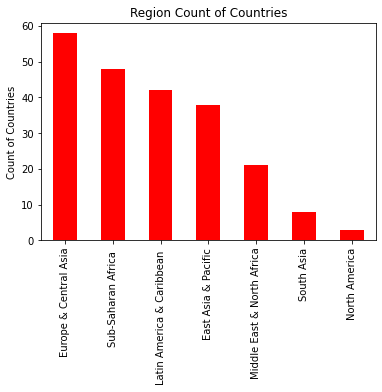

In [20]:
# Configure plot and ticks
total_region.plot(kind='bar', facecolor='r')
plt.ylabel('Count of Countries')
plt.title("Region Count of Countries")
plt.show()

In [21]:
income_lvl = clean_df['Income Lvl'].value_counts()

Text(0.5, 1.0, 'Percent of Income Countries - World Bank')

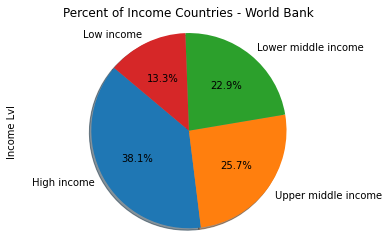

In [24]:
# configure
income_lvl.plot(kind='pie', shadow=True, autopct='%1.1f%%', startangle=140 )
plt.axis("equal")
plt.title("Percent of Income Countries - World Bank")

# Adam's Comments

Data Discovery Journey

As a group we decided to look at the World Bank API to analyze if Population Size and Income Level were closely correlated.  While doing this analysis, we realized that the World Bank API didn't have Population, meaning that we had to identify another source for that infomration.  While looking at the World Bank API, we also realized that the information was rolling up in an interesting way.  We had almost 300 entries for each year, but realized there were a little more than 200 countires in the world.  We realized that a lot of sub regions were rolling up into the data (groups of countries close in geography) as entires into the data.  The group noticed that these groups were labeled "Aggragets" in the data so we wrote code to take those rolled up entries out of the data.  

This lead to another discovery.  We found that some recognized countires show up in the data but didn't have World Bank information.  An example of this is Taiwan.  Taiwan shows up in the line item data, but didn't have a GDP.  Upon additional research, the team realized that Taiwan is rolled into China's number (perhaps due to geo political reasons).  The team also noticed that North Korea didn't show up in the data (perhaps the World Bank doesn't recognize them in this way). 

This lead to another discovery.  Not every country was in every year of the data.  We noticed that many of these countries were small and perhaps had some political/transition complication that didn't allow for the World Bank to gather information on or recognize them as a country that year.

Lastly, we noticed that not every country had GDP information for every year.  Aruba being one country when looking at the head() of the data that jumped off the page.  They had GDP inforamtion for 2015, 2016 & 2017 all of which were increasing.  But noticed that they didn't have GDP reported on 2018 and 2019.  


# Cheyenne Section

# Nathan Section

# Jonathan Section